# Exploratory Data Analysis

## Load Required Libraries

In [2]:
# General packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For data importing
# import os

In [3]:
## (Optional chunk)
# Current session information
import session_info
session_info.show(dependencies=False)

## Load data

Files of interest:
- `weir_calibration.csv` includes calibration points for the weir
- `bci_lutzweir_combined.csv` includes raw runoff measurement, corrected runoff measurement, data source (*Chart measurements can be removed)
- `bci_cl_ra_elect2.CSV` has corrected rainfall (`ra`) in mm with measurements of `0` as `NA`s (`bci_cl_ra_elect.csv` has `0`s)
- `bci_lutz_deep_gsm_man.csv`, `bci_lutz_shallow_gsm_man.csv` have soil moisture measurements (water by wet weight and water by dry weight; one can be chosen for analysis as they are linearly related)
<!-- `bci_cl_ra_elect.csv` has corrected rainfall (`ra`) in mm, contains `0`s (large file) -->

All values level values are in mm, and datetime is in UTC-5 (Panama time zone).


### Import

In [4]:
## Calibrations dataset
data_calibrations = pd.read_csv(
    "data/weir_calibration.csv",
    usecols = ['datetime', 'weir_level'], # weir_hour is a repeat of the time in datetime and can be skipped
    parse_dates=['datetime'],
    date_format='%d/%m/%Y %H:%M:%S',
    index_col='datetime'
)

data_calibrations.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6465 entries, 1994-01-03 08:46:00 to 2025-09-02 08:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   weir_level  6465 non-null   int64
dtypes: int64(1)
memory usage: 101.0 KB


In [5]:
# Combined data
# # Checking if the dataset is already loaded into the workspace
# try:
#     if data_combined.empty == False:
#         print("Data loaded, random sample shown below")
#         print(data_combined.sample(n=5))
# except NameError:
#     print("Data has not yet been read in, loading now...")
#     data_combined = pd.read_csv(
#         "data/bci_lutzweir_combined.csv",
#         usecols = ['datetime', 'level', 'raw', 'chk_note', 'chk_fail', 'comment', 'source'],
#         parse_dates=['datetime'],
#         dtype = {'source':'category', 'chk_note':'category', 'chk_fail':'str', 'comment':'str'},
#         date_format='%d/%m/%Y %H:%M:%S'
#     )

data_all_combined = pd.read_csv(
    "data/bci_lutzweir_combined.csv",
    usecols = ['datetime', 'level', 'raw', 'chk_note', 'chk_fail', 'comment', 'source'],
    parse_dates=['datetime'],
    dtype = {'source':'category', 'chk_note':'category', 'chk_fail':'str', 'comment':'str'},
    date_format='%d/%m/%Y %H:%M:%S',
    index_col='datetime'
)

data_all_combined.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3951119 entries, 1972-01-01 01:00:00 to 1977-03-06 23:45:00
Data columns (total 6 columns):
 #   Column    Dtype   
---  ------    -----   
 0   level     float64 
 1   raw       float64 
 2   chk_note  category
 3   chk_fail  object  
 4   comment   object  
 5   source    category
dtypes: category(2), float64(2), object(2)
memory usage: 158.3+ MB


In [6]:
# Rainfall dataset

# This data set includes the 0 readings:
# data_rainfall_zeroes = pd.read_csv(
#         "data/bci_elect_cl_ra/bci_cl_ra_elect.csv",
#         usecols = ['datetime', 'ra', 'raw', 'chk_note', 'chk_fail'],
#         # "data/bci_elect_cl_ra/bci_cl_ra_elect2.CSV",
#         # usecols = ['datetime', 'level', 'raw', 'chk_note', 'chk_fail', 'comment', 'source'],
#         parse_dates=['datetime'],
#         dtype = {'chk_note':'category', 'chk_fail':'str'},
#         # dtype = {'source':'category', 'chk_note':'category', 'chk_fail':'str', 'comment':'str'},
#         date_format='%d/%m/%Y %H:%M:%S'
#     )

# This data set skips the 0 readings (therefore much smaller):
data_all_rainfall = pd.read_csv(
    "data/bci_elect_cl_ra/bci_cl_ra_elect2.CSV",
    parse_dates=['datetime'],
    dtype = {'chk_note':'category', 'chk_fail':'str'},
    date_format='%d/%m/%Y %H:%M:%S',
    index_col='datetime'
)

data_all_rainfall.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 179640 entries, 1929-01-02 08:00:00 to 2025-08-04 11:55:00
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   ra        179640 non-null  float64 
 1   raw       179640 non-null  float64 
 2   chk_note  179640 non-null  category
 3   chk_fail  29 non-null      object  
dtypes: category(1), float64(2), object(1)
memory usage: 5.7+ MB


In [7]:
# Soil datasets

# Shallow
data_all_soil_shallow = pd.read_csv(
    "data/bci_manual_soilh/bci_lutz_shallow_gsm_man.csv",
    parse_dates=['date'],
    usecols = ['date', 'depth', 'sample', 'h2o_by_wet', 'chk_note', 'chk_fail'],
    dtype = {'depth':'category', 'sample':'category', 'chk_note':'category', 'chk_fail':'str'},
    date_format='%d/%m/%Y',
    index_col='date'
)

# Deep
data_all_soil_deep = pd.read_csv(
    "data/bci_manual_soilh/bci_lutz_deep_gsm_man.csv",
    parse_dates=['date'],
    usecols = ['date', 'depth', 'sample', 'h2o_by_wet', 'chk_note', 'chk_fail'],
    dtype = {'depth':'category', 'sample':'category', 'chk_note':'category', 'chk_fail':'str'},
    date_format='%d/%m/%Y',
    index_col='date'
)

# print(data_soil_shallow['sample'].value_counts(dropna = False))
# print(data_soil_shallow['depth'].value_counts(dropna = False))
# print(data_soil_deep['depth'].value_counts(dropna = False))
# print(data_soil_deep['sample'].value_counts(dropna = False))

data_all_soil_shallow.info()
data_all_soil_deep.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18556 entries, 1972-03-03 to 2025-06-26
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   depth       18556 non-null  category
 1   sample      18556 non-null  category
 2   h2o_by_wet  18556 non-null  float64 
 3   chk_note    18556 non-null  category
 4   chk_fail    178 non-null    object  
dtypes: category(3), float64(1), object(1)
memory usage: 490.8+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15637 entries, 1972-03-03 to 2025-06-26
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   depth       15637 non-null  category
 1   sample      15637 non-null  category
 2   h2o_by_wet  15637 non-null  float64 
 3   chk_note    15637 non-null  category
 4   chk_fail    20 non-null     object  
dtypes: category(3), float64(1), object(1)
memory usage: 413.4+ KB


### Cleanup

In [8]:
# Get earliest and latest dates of sources

cat_source = data_all_combined.sort_index()['source'].unique().tolist()
for cat in cat_source:
    if pd.isna(cat) == True:
        temp_subset = data_all_combined[data_all_combined["source"].isnull()]
    else:
        temp_subset = data_all_combined[data_all_combined["source"]==cat]
    temp_subset = temp_subset.sort_index()
    print(temp_subset.index[0], "", temp_subset.index[-1], cat)
    # print(min(temp_subset['datetime']), "", max(temp_subset['datetime']), cat)

# Save space, remove no longer needed items
del cat_source, cat, temp_subset

1972-01-01 01:00:00  2015-03-18 14:15:00 CHART
1972-09-16 00:15:00  2025-08-01 13:00:00 nan
1989-07-19 11:55:00  1996-10-01 23:55:00 CHART+AF
1996-10-02 00:00:00  2013-01-13 05:50:00 ISCO
2012-04-23 08:30:00  2012-04-24 08:35:00 ESTIMATED
2014-08-22 10:30:00  2021-05-19 09:40:00 RADAR
2018-08-31 10:05:00  2018-09-05 12:55:00 TROLL


In [9]:
# print(data_combined.dtypes)
# print("Source:", data_combined['source'].cat.categories.tolist())
# print("Notes:", data_combined['chk_note'].cat.categories.tolist())
# print("Fail mode:", data_combined['chk_fail'].unique())
# print("Comments:", data_combined['comment'].unique())

In [11]:
# Filtering data sets for relevant dates

# Exclude old chart data
# data_combined = data_all_combined[~data_all_combined['source'].str.contains("CHART", na=False)]
# data_combined = data_all_combined[~data_all_combined['source']=="CHART"]
data_combined = data_all_combined[data_all_combined['source']!='CHART']
# Remove missing values
data_combined = data_combined[data_combined['chk_note']!='missing']

# Arrange for visualization & indexing
data_combined = data_combined.sort_index()
# Remove a few extra points
data_combined = data_combined['1978-01-01 00:00:01':]

# Get earliest and latest dates
date_weir_start = data_combined.index[0]
date_weir_end = data_combined.index[-1]

# Create function to filter dates
def filter_dates(input_dataset, input_date_start = date_weir_start, input_date_end = date_weir_end):
    # Sort the dataframe
    data_subset = input_dataset.sort_index()
    # Filter between dates
    data_subset = data_subset.loc[input_date_start:input_date_end]
    return data_subset

# Apply filter
data_rainfall = filter_dates(data_all_rainfall)
data_soil_deep = filter_dates(data_all_soil_deep)
data_soil_shallow = filter_dates(data_all_soil_shallow)
# data_nochart_soil_shallow[~data_nochart_soil_shallow['sample'].isin(["1","2","3","4","5","6","7","8","9","10"])]

In [12]:
# Remove old stuff
del data_all_combined, data_all_rainfall, data_all_soil_shallow, data_all_soil_deep

## General Variable Exploration

In [13]:
# Explore weir combined data, comments, etc.

# print(
#     data_nochart_combined.dtypes,
#     # "\n\n", "Source:", data_nochart_combined['source'].cat.categories.tolist(),
#     # "\n\n", "Notes:", data_nochart_combined['chk_note'].cat.categories.tolist(),
#     "\n\n", "Source:", data_nochart_combined['source'].unique(),
#     "\n\n", "Notes:", data_nochart_combined['chk_note'].unique(),
#     "\n\n", "Comments:", data_nochart_combined['comment'].unique(),
#     "\n\n", "Fail mode:", data_nochart_combined['chk_fail'].unique()
# )

# Counts of each 'source' type
print(
    data_combined['source'].value_counts(dropna = False),
    data_combined['chk_note'].value_counts(dropna = False),
    data_combined['comment'].value_counts(dropna=False),
    data_combined['chk_fail'].unique(),
    sep="\n\n"
)

source
ISCO         1656120
CHART+AF      752435
RADAR         702704
NaN           508988
TROLL           1428
ESTIMATED        290
CHART              0
Name: count, dtype: int64

chk_note
good        2455818
adjusted     832182
nc           333964
bad               1
missing           0
Name: count, dtype: int64

comment
NaN             3621949
Data missing         16
Name: count, dtype: int64

[nan 'Obstruction' 'Calibration' 'Spike' 'Calibration, Calibration'
 'Gap Fill' 'Gap Fill, Gap Fill' 'Obstruction, Obstruction'
 'Obstruction, Calibration' 'Spike, Spike' 'Gap Fill, Gap Fill, Gap Fill'
 'Gap Fill, Gap Fill, Gap Fill, Gap Fill' 'Obstruction, Step' 'Step'
 'Spike, Obstruction' 'Calibration, Spike, Obstruction'
 'Calibration, Obstruction' 'Obstruction, Calibration, Obstruction'
 'Calibration, Calibration, Obstruction'
 'Calibration, Calibration, Calibration' 'Calibration, Spike'
 'Obstruction, Obstruction, Calibration'
 'Obstruction, Obstruction, Obstruction, Calibration' 'Spike,

In [ ]:
# soil info

# print(data_nochart_soil_shallow['sample'].value_counts(dropna = False),
#       data_nochart_soil_shallow['depth'].value_counts(dropna = False),
#       data_nochart_soil_deep['sample'].value_counts(dropna = False),
#       data_nochart_soil_deep['depth'].value_counts(dropna = False),
#       sep = "\n\n"
#       )

# print(data_nochart_soil_deep[~data_nochart_soil_deep['depth'].str.contains("30-40", na=False)])

# # data_soil_deep[~data_soil_deep['sample'].str.contains("1|2|3|4|5|6|7|8|9|10", na=False)]
# data_nochart_soil_shallow[~data_nochart_soil_shallow['sample'].isin(["1","2","3","4","5","6","7","8","9","10"])]

# # print(data_soil_deep['sample'].value_counts(dropna = False))
# # print(data_soil_deep['depth'].value_counts(dropna = False))

## Visualization

In [ ]:
def plot_between(input_date_start, input_date_end):
    data_subset = data_combined.loc[input_date_start:input_date_end]

    data_subset_rain = data_rainfall.sort_index()
    data_subset_rain = data_subset_rain.loc[input_date_start:input_date_end]

    data_subset_cal = data_calibrations.sort_index()
    data_subset_cal = data_subset_cal.loc[input_date_start:input_date_end]
    # plt.figure(figsize = (10,6))
    # plt.plot(data_subset.index, data_subset['raw'])

    fig, ax = plt.subplots(figsize=(10, 6))
    # ax.figure(figsize=(10, 6))
    plt.axhline(y=0, color = "grey", linestyle = ":")
    ax.vlines(data_subset_rain.index, ymin=0, ymax=data_subset_rain['ra']*3, color = "blue", label = "Rain (x3)")
    ax.plot(data_subset.index, data_subset['level'], color = "red", label = "Adjusted")
    ax.plot(data_subset.index, data_subset['raw'], color = "green", label = "Raw")
    ax.plot(data_subset_cal.index, data_subset_cal['weir_level'], linestyle='none', marker='x', color="red", label = "Calibration")
    # plt.plot(data_subset_rain.index, data_subset_rain['ra']*3, color = "blue", linestyle='none', marker='o')
    # plt.plot(data_calibrations.index, data_calibrations['level'], color = "red")
    ax.set_xlabel('Date (YYYY-MM-DD)')
    ax.set_ylabel('Level (mm)')
    # ax.set_title('Simple Time Series Plot')
    # ax.set_ylim(bottom=0) 
    # ax.grid(True)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.legend(loc = 'upper right')
    return plt.show()

In [ ]:
# plot_between('2010-05-20 00:00:01','2010-05-25 23:59:59')
# plot_between('2020-05-31 00:00:01','2020-06-16 23:59:59')
# plot_between('2023-05-14 00:00:01','2023-06-15 23:59:59')
plot_between('2002-07-30 00:00:01','2002-08-02 23:59:59')

In [ ]:
# print('chk_note:', data_combined_sources['chk_note'].cat.categories.tolist())
# print('chk_fail:', data_combined_sources['chk_fail'].cat.categories.tolist())
# print('source:', data_combined_sources['source'].cat.categories.tolist())

# data_combined_sources[data_combined_sources['source']=='TROLL']
# data_combined_sources.T['source']
# data_combined_sources.sample(10)["source"]

# counts of each 'source' type
print(data_combined['chk_note'].value_counts(dropna = False))
print(data_combined['comment'].value_counts(dropna=False))
print(data_combined['source'].value_counts(dropna = False))

# data_combined.info()


## Statistics

In [ ]:
# data_combined['2013-01-01 00:00:01':'2013-12-31 23:59:59']

# data_combined[data_combined['raw']==-999]

In [14]:
# time_series = pd.Series(data_combined, index='datetime')
# time_series
# pd.DatetimeIndex.to_series(data_combined)
# time_series = pd.to_datetime(data_combined.index())

# data_combined.index.year
# data_mini = data_combined['2010-05-20 00:00:01':'2010-05-25 23:59:59']
# data_mini = data_combined['2010-05-01 00:00:01':'2010-10-31 23:59:59']
# data_mini['raw'].resample('1ME').agg(['mean','std'])

# data_mini.rolling(2, on='raw').sum()
# data_mini.rolling('1D', on='raw').sum()
# data_mini['raw'].rolling('1D').mean()
# data_mini['raw'].rolling('1D', closed='left').mean()
# data_mini['raw'].resample('1D').mean()

# data_mini['raw'].resample('1ME').mean()
# data_combined['raw'].dropna()
# data_combined['raw'].resample('YE').agg(['mean','std'])
# data_mini = data_combined['raw'].dropna()
# data_combined['1972-01-01 00:00:01':'1973-12-31 23:59:59']

# # Remove missing values
# data_mini = data_combined[data_combined['chk_note']!='missing']
# # Remove a few extra points
# data_mini = data_mini['1978-01-01 00:00:01':]
# data_mini.resample('YE').agg(['mean','std'])

# data_sumstats = data_mini['1989-01-01 00:00:01':'1989-12-31 23:59:59']
data_sumstats = data_combined['raw'].dropna().resample('YE').agg(['mean','std']).dropna()
data_sumstats
# plt.figure(figsize=(12,6))
# plt.plot(data_sumstats.index, data_sumstats['mean'])
# plt.plot(data_sumstats.index, data_sumstats['std'])
# plt.show()

# print(data_mini['source'].value_counts(dropna = False))
# data_mini.rolling('1D').sum()
# data_mini.rolling(5).sum()

,mean,std
datetime,,
1989-12-31,57.122167,36.341293
1990-12-31,52.775952,41.267992
1991-12-31,46.408461,36.263957
1992-12-31,55.170399,44.542390
1993-12-31,55.913420,39.972787
1994-12-31,47.014593,33.436377
1995-12-31,47.211930,32.870688
1996-12-31,61.621517,38.885258
1997-12-31,-2.068139,198.524520


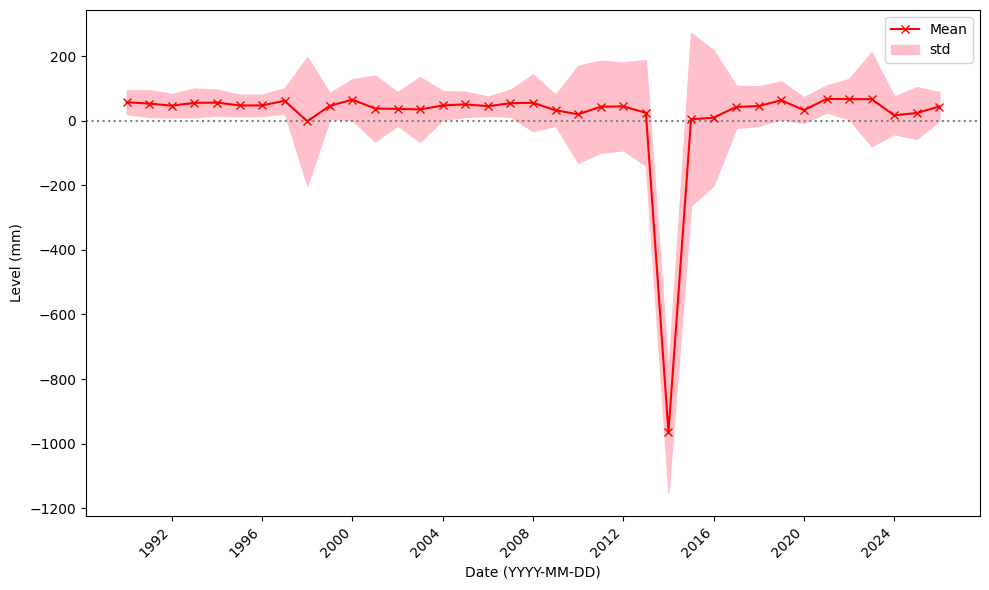

In [15]:
#Plot

fig, ax = plt.subplots(figsize=(10, 6))
    # ax.figure(figsize=(10, 6))
plt.axhline(y=0, color = "grey", linestyle = ":")
# ax.vlines(data_subset_rain.index, ymin=0, ymax=data_subset_rain['ra']*3, color = "blue", label = "Rain (x3)")
ax.plot(data_sumstats.index, data_sumstats['mean'], color = "red", label = "Mean", marker = 'x')
# ax.plot(data_sumstats.index, data_sumstats['std'], color = "green", label = "std")
ax.fill_between(data_sumstats.index, data_sumstats['mean']-data_sumstats['std'], data_sumstats['mean']+data_sumstats['std'], color = "pink", label = "std")
# ax.plot(data_subset_cal.index, data_subset_cal['weir_level'], linestyle='none', marker='x', color="red", label = "Calibration")
# plt.plot(data_subset_rain.index, data_subset_rain['ra']*3, color = "blue", linestyle='none', marker='o')
# plt.plot(data_calibrations.index, data_calibrations['level'], color = "red")
ax.set_xlabel('Date (YYYY-MM-DD)')
ax.set_ylabel('Level (mm)')
# ax.set_title('Simple Time Series Plot')
# ax.set_ylim(bottom=0) 
# ax.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(loc = 'upper right')